In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# Data Collection

In [2]:
# reading a csv file using pandas library
sal=pd.read_csv("C:/Users/manth/Assignment/Simple linear/Salary_Data.csv")
sal.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# Exploratory Data Analysis (EDA)

In [3]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
sal.isnull().sum()      #checking for null value

YearsExperience    0
Salary             0
dtype: int64

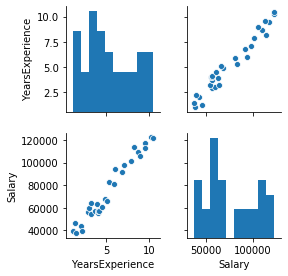

In [5]:
import seaborn as sns
sns.pairplot(sal,height= 2)
plt.show()

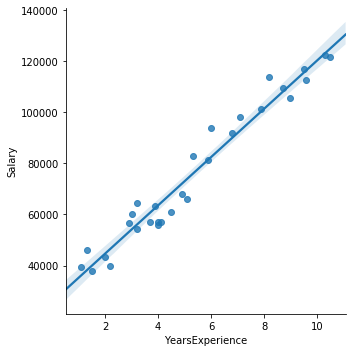

In [6]:
sns.lmplot(x = 'YearsExperience', y='Salary',data=sal)
plt.show()

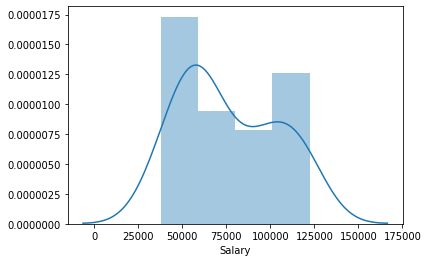

In [7]:
sns.distplot(sal['Salary'])
plt.show()

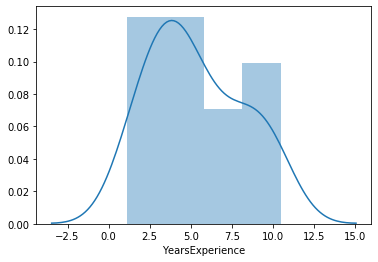

In [8]:
sns.distplot(sal['YearsExperience'])
plt.show()

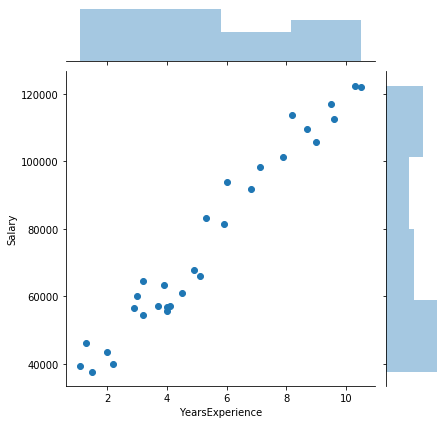

In [9]:
sns.jointplot(data = sal, x = 'YearsExperience', y='Salary')
plt.show()

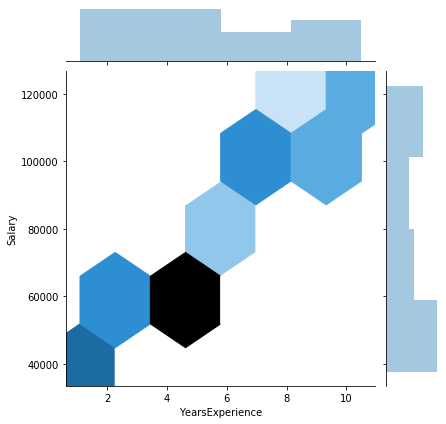

In [10]:
sns.jointplot(x = 'YearsExperience', y='Salary', kind='hex',data=sal)
plt.show()

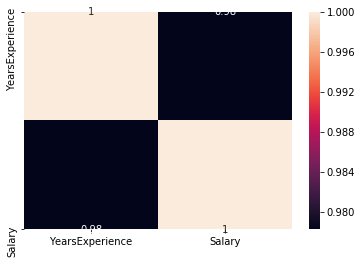

In [11]:
sns.heatmap(sal.corr(),annot=True)
plt.show()

In [12]:
#correlation value between feature and outcome
sal.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


# Linear Regression Model

In [13]:
# For preparing linear regression model we need to import the statsmodels.formula.api
import statsmodels.formula.api as smf
model1 = smf.ols("Salary~YearsExperience",data=sal).fit()

model1.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [14]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 30 Sep 2020   Prob (F-statistic):           1.14e-20
Time:                        18:38:14   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
model1.conf_int(0.05)

,0,1
Intercept,21136.061314,30448.339084
YearsExperience,8674.118747,10225.805896


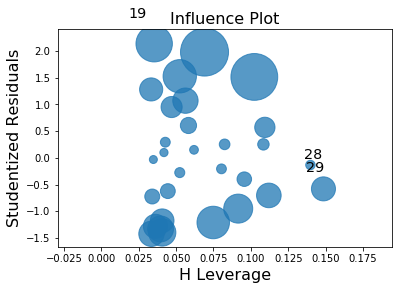

In [16]:
import statsmodels.api as sm
sm.graphics.influence_plot(model1)
plt.show()

In [17]:
pred = model1.predict(sal.iloc[:,0])
pred.head()

0    36187.158752
1    38077.151217
2    39967.143681
3    44692.124842
4    46582.117306
dtype: float64

In [18]:
np.sqrt(np.mean((pred-sal.Salary)**2))

5592.043608760663

In [19]:
pred.corr(sal.Salary)

0.9782416184887601

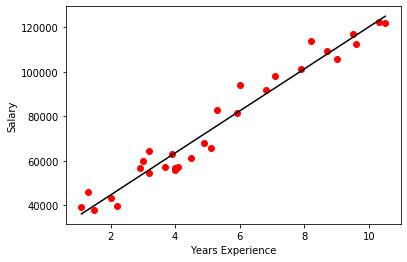

In [20]:
import matplotlib.pylab as plt
plt.scatter(x=sal['YearsExperience'],y=sal['Salary'],color='red');plt.plot(sal['YearsExperience'],pred,color='black');
plt.xlabel('Years Experience');plt.ylabel('Salary')
plt.show()

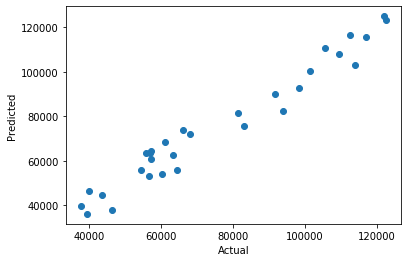

In [21]:
plt.scatter(x=sal.Salary, y=pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()  

In [22]:
# Quadratic model
sal["YearsExperience_square"]=sal.YearsExperience*sal.YearsExperience
sal.head()

,YearsExperience,Salary,YearsExperience_square
0,1.1,39343.0,1.21
1,1.3,46205.0,1.69
2,1.5,37731.0,2.25
3,2.0,43525.0,4.00
4,2.2,39891.0,4.84


In [23]:
model_quad=smf.ols("Salary~YearsExperience_square+YearsExperience_square",data=sal).fit()
model_quad.params

Intercept                 48042.585515
YearsExperience_square      776.318773
dtype: float64

In [24]:
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     302.7
Date:                Wed, 30 Sep 2020   Prob (F-statistic):           1.52e-16
Time:                        18:38:43   Log-Likelihood:                -311.59
No. Observations:                  30   AIC:                             627.2
Df Residuals:                      28   BIC:                             630.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               4.804e+04   2186.372     21.974      0.000    4.36e+04    5.25e+04
YearsExperience_square   776.3188     44.624     17.397      0.000     684.911     867.726
==============================================================================
Omnibus:                        1.294   Durbin-Watson:                   0.883
Prob(Omnibus):                  0.524   Jarque-Bera (JB):                1.240
Skew:                           0.409   Prob(JB):                        0.538
Kurtosis:                       2.432   Cond. No.                         72.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
model_quad.conf_int(0.05)

,0,1
Intercept,43564.005053,52521.165976
YearsExperience_square,684.911317,867.726229


In [26]:
pred_quad=model_quad.predict(sal.iloc[:,:3])
pred_quad.head()

0    48981.931230
1    49354.564241
2    49789.302755
3    51147.860608
4    51799.968377
dtype: float64

In [27]:
#rmse for quadratic model
rmse_quad=np.sqrt(np.mean((pred_quad-sal.Salary)**2))
rmse_quad

7843.471199698865

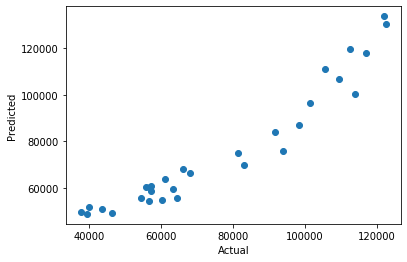

In [28]:
plt.scatter(x=sal.Salary, y=pred_quad)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()